# Plot results of the efficiency measurement

In [9]:
import ROOT
import numpy as np
from array import array
import CMS_lumi

In [6]:
f_jet40 = ROOT.TFile("../data/rootFilesTurnOn/TriggerEffHisto_data_match40_JETLEG.root")
f_jet45 = ROOT.TFile("../data/rootFilesTurnOn/TriggerEffHisto_data_match45_JETLEG.root")
f_tau40 = ROOT.TFile("../data/rootFilesTurnOn/TriggerEffHisto_match40_newTauID.root")
f_tau45 = ROOT.TFile("../data/rootFilesTurnOn/TriggerEffHisto_match45_newTauID.root")
orig_jet40 = f_jet40.Get("jet4_eff")
orig_jet45 = f_jet45.Get("jet4_eff")
orig_tau40 = f_tau40.Get("eff_tau")
orig_tau45 = f_tau45.Get("eff_tau")

In [7]:
ff = ROOT.TFile("../data/trigger_eff3.root")
#ff = ROOT.TFile("../trigger_eff2.root")
open_jet40 = ff.Get("jet4_eff_40")
open_jet45 = ff.Get("jet4_eff_45")
open_tau40 = ff.Get("tau_eff_40")
open_tau45 = ff.Get("tau_eff_45")

In [149]:
x_orig40 = [12.745, 17.647, 22.704, 27.554, 32.714, 37.564, 42.518, 47.575, 55.212, 65.015, 75.129, 85.139, 95.304]
y_orig40 = [1.13, 1.252, 1.389, 1.786, 3.084, 5.359, 8.565,  8.947, 8.931, 8.718, 8.702, 9.13, 9.313]
y_orig40 = np.array(y_orig40)/10
x_orig45 = [12.442, 17.519, 22.403, 27.364, 32.481, 37.364, 42.403, 47.519, 54.806, 64.884, 74.961, 85.116, 95.155]
y_orig45 = [0.115, 0.107, 0.127, 0.172, 0.251, 0.407, 0.632, 0.88, 0.904, 0.898, 0.902, 0.89, 0.887]

In [150]:
def to_graph(x, y):
    xr, yr = array( 'd' ), array( 'd' )
    for x_coord, y_coord in zip(x, y):
        xr.append( x_coord )
        yr.append( y_coord )
    gr = ROOT.TGraph( 13, xr, yr )
    gr.SetMarkerSize( 0.5 )
    gr.SetMarkerColor( 4 )
    gr.SetMarkerStyle( 10 )
    return gr

In [108]:
orig_tau40 = to_graph(x_orig40, y_orig40)
orig_tau45 = to_graph(x_orig45, y_orig45)

## Jet efficiencies

python ERROR: cannot open image file "plots/jet_eff.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file plots/jet_eff.png


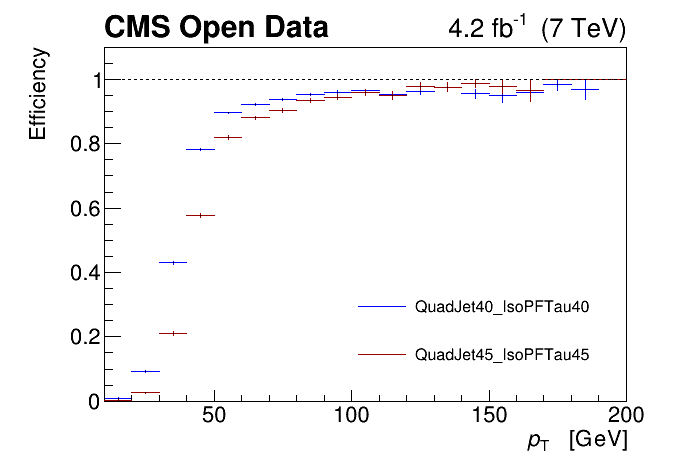

In [10]:
c = ROOT.TCanvas()
ROOT.gStyle.SetOptStat(0)
open_jet40.Draw()
open_jet40.SetLineColor(ROOT.kBlue)
open_jet40.SetLineWidth(1)
open_jet45.Draw("SAME")
open_jet45.SetLineColor(ROOT.kRed+2)
open_jet45.SetLineWidth(1)

open_jet40.SetTitle("")
open_jet40.GetXaxis().SetTitle("p_\mathrm{T} \ \mathrm{[GeV]}")
open_jet40.GetXaxis().SetTitleSize(0.05)
open_jet40.GetYaxis().SetTitle("Efficiency")
open_jet40.GetYaxis().SetTitleSize(0.05)
open_jet40.GetXaxis().SetLabelSize(0.05)
open_jet40.GetYaxis().SetLabelSize(0.05)
open_jet40.GetXaxis().SetNdivisions(505)
open_jet40.GetYaxis().SetRangeUser(0., 1.1)

leg = ROOT.TLegend(0.5, 0.2, .89, .4);
leg.AddEntry(open_jet40, "QuadJet40_IsoPFTau40", "l");
leg.AddEntry(open_jet45, "QuadJet45_IsoPFTau45", "l");
leg.SetBorderSize(0)
leg.Draw("SAME")

x0 = open_jet40.GetXaxis().GetXmin()
x1 = open_jet40.GetXaxis().GetXmax()
f1 = ROOT.TLine(x0, 1., x1,1.)
f1.SetLineColor(ROOT.kBlack)
f1.SetLineStyle(ROOT.kDashed)
f1.Draw("same")

lumi_sqrtS = " 4.2 fb^{-1}  (7 TeV)"
#    print lumi_sqrtS
iPos = 0
# writing the lumi information and the CMS "logo"
# Ratio Check HERE
CMS_lumi.CMS_lumi(c, lumi_sqrtS, 0, 0.7, 0.6, 0.15)

c.SetBottomMargin(0.15)
c.SetLeftMargin(0.15)
c.Draw()
c.Print( "plots/jet_eff.png" )

10.0


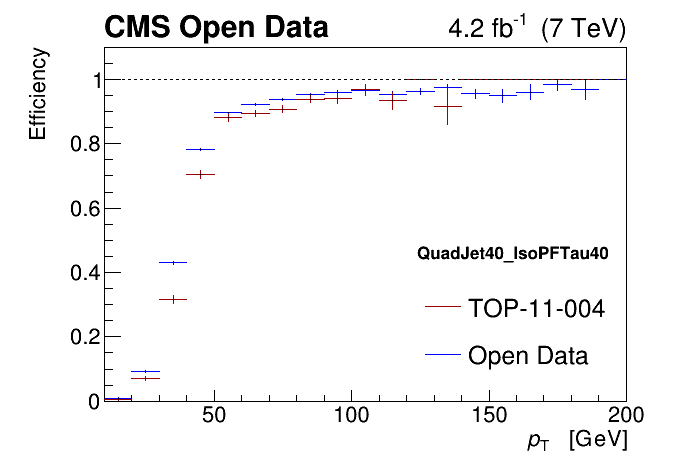

In [16]:
c = ROOT.TCanvas()
ROOT.gStyle.SetOptStat(0)
open_jet40.Draw()
open_jet40.SetLineColor(ROOT.kBlue)
orig_jet40.Draw("SAME")
orig_jet40.SetLineColor(ROOT.kRed+2)

open_jet40.SetTitle("")
open_jet40.GetXaxis().SetTitle("p_\mathrm{T} \ \mathrm{[GeV]}")
open_jet40.GetXaxis().SetTitleSize(0.05)
open_jet40.GetYaxis().SetTitle("Efficiency")
open_jet40.GetYaxis().SetTitleSize(0.05)
open_jet40.GetXaxis().SetLabelSize(0.05)
open_jet40.GetYaxis().SetLabelSize(0.05)
open_jet40.GetXaxis().SetNdivisions(505)
open_jet40.GetYaxis().SetRangeUser(0., 1.1)



t =ROOT.TLatex(0.6, 0.45, "QuadJet40_IsoPFTau40")
#t.SetTextAlign(12)
t.SetTextSize(0.04)
t.SetNDC()
t.Draw("SAME")

x0 = open_jet40.GetXaxis().GetXmin()
x1 = open_jet40.GetXaxis().GetXmax()
f1 = ROOT.TLine(x0, 1., x1,1.)
f1.SetLineColor(ROOT.kBlack)
f1.SetLineStyle(ROOT.kDashed)
f1.Draw("same")

leg = ROOT.TLegend(0.6, 0.2, .89, .4);
leg.AddEntry(orig_jet40, "TOP-11-004", "l");
leg.AddEntry(open_jet40, "Open Data", "l");
leg.SetBorderSize(0)

leg.Draw("SAME")

lumi_sqrtS = " 4.2 fb^{-1}  (7 TeV)"
#    print lumi_sqrtS
iPos = 0
# writing the lumi information and the CMS "logo"
# Ratio Check HERE
print(x0)
CMS_lumi.CMS_lumi(c, lumi_sqrtS, 0, 0.7, 0.6, 0.15)
c.SetBottomMargin(0.15)
c.SetLeftMargin(0.15)

c.Draw()

10.0


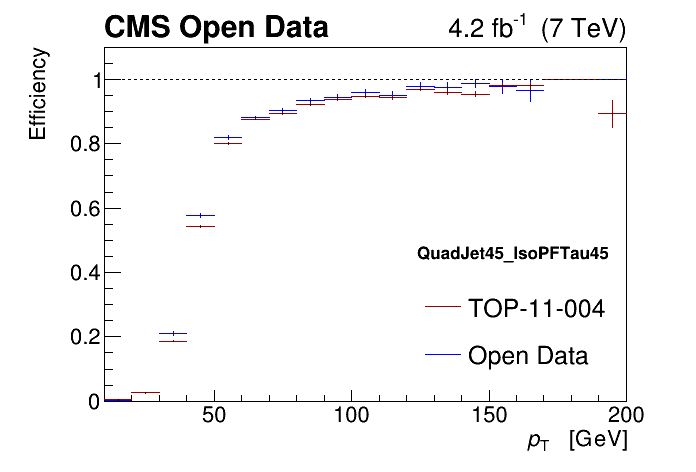

In [18]:
c2 = ROOT.TCanvas()
ROOT.gStyle.SetOptStat(0)
open_jet45.Draw()
open_jet45.SetLineColor(ROOT.kBlue)
orig_jet45.Draw("SAME")
orig_jet45.SetLineColor(ROOT.kRed+2)

open_jet45.SetTitle("")
open_jet45.GetXaxis().SetTitle("p_\mathrm{T} \ \mathrm{[GeV]}")
open_jet45.GetXaxis().SetTitleSize(0.05)
open_jet45.GetYaxis().SetTitle("Efficiency")
open_jet45.GetYaxis().SetTitleSize(0.05)
open_jet45.GetXaxis().SetLabelSize(0.05)
open_jet45.GetYaxis().SetLabelSize(0.05)
open_jet45.GetXaxis().SetNdivisions(505)
open_jet45.GetYaxis().SetRangeUser(0., 1.1)


t =ROOT.TLatex(0.6, 0.45, "QuadJet45_IsoPFTau45")
#t.SetTextAlign(12)
t.SetTextSize(0.04)
t.SetNDC()
t.Draw("SAME")

x0 = open_jet45.GetXaxis().GetXmin()
x1 = open_jet45.GetXaxis().GetXmax()
f1 = ROOT.TLine(x0, 1., x1,1.)
f1.SetLineColor(ROOT.kBlack)
f1.SetLineStyle(ROOT.kDashed)
f1.Draw("same")

leg = ROOT.TLegend(0.6, 0.2, .89, .4);
leg.AddEntry(orig_jet45, "TOP-11-004", "l");
leg.AddEntry(open_jet45, "Open Data", "l");
leg.SetBorderSize(0)

leg.Draw("SAME")

lumi_sqrtS = " 4.2 fb^{-1}  (7 TeV)"
#    print lumi_sqrtS
iPos = 0
# writing the lumi information and the CMS "logo"
# Ratio Check HERE
print(x0)
CMS_lumi.CMS_lumi(c2, lumi_sqrtS, 0, 0.7, 0.6, 0.15)
c2.SetBottomMargin(0.15)
c2.SetLeftMargin(0.15)

c2.Draw()

## Tau efficiencies

In [154]:
print( tau_eff_40.GetEntries() )
print( h_eff_tau40.GetEntries() )
print( tau_eff_45.GetEntries() )
print( h_eff_tau45.GetEntries() )

NameError: name 'tau_eff_40' is not defined

In [156]:
import importlib

In [157]:
importlib.reload(CMS_lumi)

<module 'CMS_lumi' from '/eos/home-l/llayer/cmsopen/columnar/nbs/CMS_lumi.py'>

0.0


python ERROR: cannot open image file "plots/tau_eff.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file plots/tau_eff.png


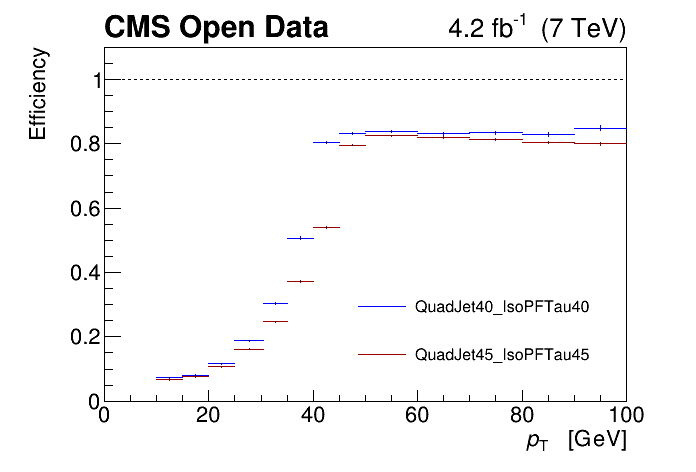

In [173]:
c = ROOT.TCanvas()
ROOT.gStyle.SetOptStat(0)
open_tau40.Draw()
open_tau40.SetLineColor(ROOT.kBlue)
open_tau40.SetLineWidth(1)
open_tau45.Draw("SAME")
open_tau45.SetLineColor(ROOT.kRed+2)
open_tau45.SetLineWidth(1)

open_tau40.SetTitle("")
open_tau40.GetXaxis().SetTitle("p_\mathrm{T} \ \mathrm{[GeV]}")
open_tau40.GetXaxis().SetTitleSize(0.05)
open_tau40.GetYaxis().SetTitle("Efficiency")
open_tau40.GetYaxis().SetTitleSize(0.05)
open_tau40.GetXaxis().SetLabelSize(0.05)
open_tau40.GetYaxis().SetLabelSize(0.05)
open_tau40.GetXaxis().SetNdivisions(505)
open_tau40.GetYaxis().SetRangeUser(0., 1.1)

leg = ROOT.TLegend(0.5, 0.2, .89, .4);
leg.AddEntry(open_tau40, "QuadJet40_IsoPFTau40", "l");
leg.AddEntry(open_tau45, "QuadJet45_IsoPFTau45", "l");
leg.SetBorderSize(0)
leg.Draw("SAME")

x0 = open_tau40.GetXaxis().GetXmin()
x1 = open_tau40.GetXaxis().GetXmax()
f1 = ROOT.TLine(x0, 1., x1,1.)
f1.SetLineColor(ROOT.kBlack)
f1.SetLineStyle(ROOT.kDashed)
f1.Draw("same")

lumi_sqrtS = " 4.2 fb^{-1}  (7 TeV)"
#    print lumi_sqrtS
iPos = 0
# writing the lumi information and the CMS "logo"
# Ratio Check HERE
print(x0)
CMS_lumi.CMS_lumi(c, lumi_sqrtS, 0, 0.7, 0.6, 0.15)
c.SetBottomMargin(0.15)
c.SetLeftMargin(0.15)
c.Draw()

c.Print( "plots/tau_eff.png" )

In [159]:
c.GetPad(0)

<ROOT.TCanvas object ("c1") at 0x728afb0>

0.0


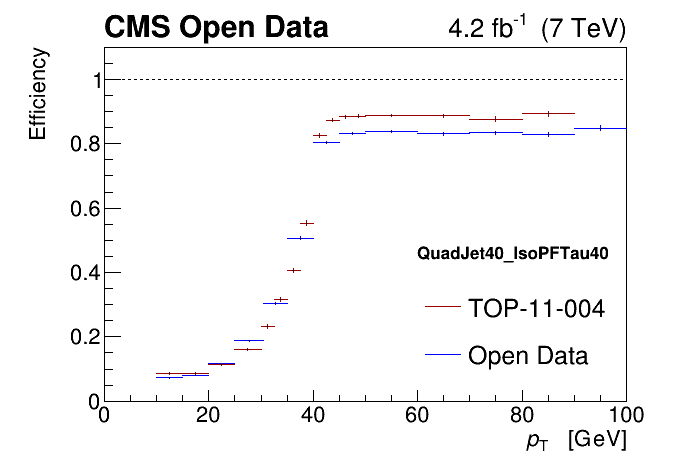

In [174]:
c3 = ROOT.TCanvas()
ROOT.gStyle.SetOptStat(0)
open_tau40.Draw()
open_tau40.SetLineColor(ROOT.kBlue)
#orig_tau40.Draw("SAME")
#orig_tau40.SetLineColor(ROOT.kRed+2)

orig_tau40.Draw("PSAME")
orig_tau40.SetLineColor(ROOT.kRed+2)

open_tau40.GetXaxis().SetTitle("p_\mathrm{T} \ \mathrm{[GeV]}")
open_tau40.GetXaxis().SetTitleSize(0.05)
open_tau40.GetYaxis().SetTitle("Efficiency")
open_tau40.GetYaxis().SetTitleSize(0.05)
open_tau40.GetXaxis().SetLabelSize(0.05)
open_tau40.GetYaxis().SetLabelSize(0.05)
open_tau40.GetXaxis().SetNdivisions(505)
open_tau40.GetYaxis().SetRangeUser(0., 1.1)

t =ROOT.TLatex(0.6, 0.45, "QuadJet40_IsoPFTau40")
#t.SetTextAlign(12)
t.SetTextSize(0.04)
t.SetNDC()
t.Draw("SAME")

x0 = open_tau40.GetXaxis().GetXmin()
x1 = open_tau40.GetXaxis().GetXmax()
f1 = ROOT.TLine(x0, 1., x1,1.)
f1.SetLineColor(ROOT.kBlack)
f1.SetLineStyle(ROOT.kDashed)
f1.Draw("same")

leg = ROOT.TLegend(0.6, 0.2, .89, .4);
leg.AddEntry(orig_tau40, "TOP-11-004", "l");
leg.AddEntry(open_tau40, "Open Data", "l");
leg.SetBorderSize(0)

leg.Draw("SAME")

lumi_sqrtS = " 4.2 fb^{-1}  (7 TeV)"
#    print lumi_sqrtS
iPos = 0
# writing the lumi information and the CMS "logo"
# Ratio Check HERE
print(x0)
CMS_lumi.CMS_lumi(c3, lumi_sqrtS, 0, 0.7, 0.6, 0.15)
c3.SetBottomMargin(0.15)
c3.SetLeftMargin(0.15)

c3.Draw()

0.0


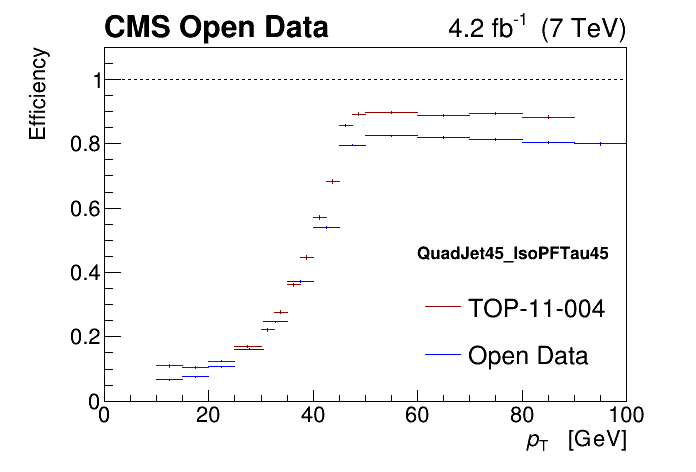

In [175]:
c4 = ROOT.TCanvas()
ROOT.gStyle.SetOptStat(0)
open_tau45.Draw()
open_tau45.SetLineColor(ROOT.kBlue)
#orig_tau40.Draw("SAME")
#orig_tau40.SetLineColor(ROOT.kRed+2)

open_tau45.SetTitle("")

orig_tau45.Draw("PSAME")
orig_tau45.SetLineColor(ROOT.kRed+2)

open_tau45.GetXaxis().SetTitle("p_\mathrm{T} \ \mathrm{[GeV]}")
open_tau45.GetXaxis().SetTitleSize(0.05)
open_tau45.GetYaxis().SetTitle("Efficiency")
open_tau45.GetYaxis().SetTitleSize(0.05)
open_tau45.GetXaxis().SetLabelSize(0.05)
open_tau45.GetYaxis().SetLabelSize(0.05)
open_tau45.GetXaxis().SetNdivisions(505)
open_tau45.GetYaxis().SetRangeUser(0., 1.1)

t =ROOT.TLatex(0.6, 0.45, "QuadJet45_IsoPFTau45")
#t.SetTextAlign(12)
t.SetTextSize(0.04)
t.SetNDC()
t.Draw("SAME")

x0 = open_tau45.GetXaxis().GetXmin()
x1 = open_tau45.GetXaxis().GetXmax()
f1 = ROOT.TLine(x0, 1., x1,1.)
f1.SetLineColor(ROOT.kBlack)
f1.SetLineStyle(ROOT.kDashed)
f1.Draw("same")

leg = ROOT.TLegend(0.6, 0.2, .89, .4);
leg.AddEntry(orig_tau40, "TOP-11-004", "l");
leg.AddEntry(open_tau40, "Open Data", "l");
leg.SetBorderSize(0)

leg.Draw("SAME")

lumi_sqrtS = " 4.2 fb^{-1}  (7 TeV)"
#    print lumi_sqrtS
iPos = 0
# writing the lumi information and the CMS "logo"
# Ratio Check HERE
print(x0)
CMS_lumi.CMS_lumi(c4, lumi_sqrtS, 0, 0.7, 0.6, 0.15)
c4.SetBottomMargin(0.15)
c4.SetLeftMargin(0.15)

c4.Draw()

In [142]:
f_semi = ROOT.TFile("../Final_rootfiles/SemiLeptonicTauXsectionMeas_searchsample.root")
f_sel = ROOT.TFile("../Final_rootfiles/selection1.root")
d = f_sel.Get("MyModule")

0.0


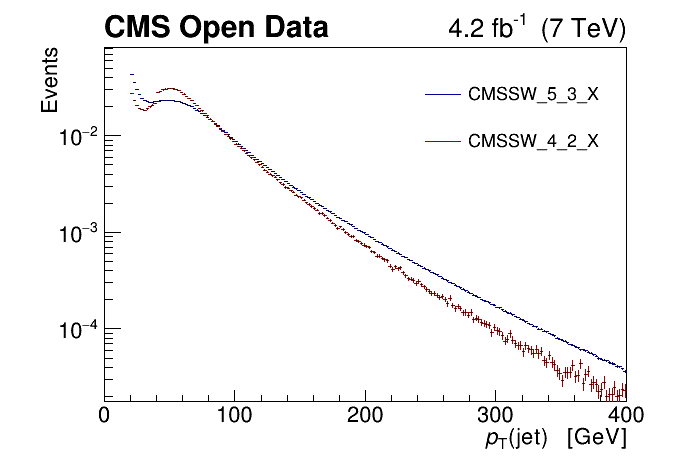

In [143]:
h = d.Get("Pt_jet_jet_all")
h2 = f_semi.Get("SemiLeptonicTauAnaPlots/Jets/all/All/DATA/Pt")
c = ROOT.TCanvas()
h.Draw()
h.Scale(1/h.Integral())
h2.Draw("SAME")
h2.Scale(1/h2.Integral())
h2.SetLineColor(ROOT.kRed+2)
h.SetTitle("")
c.SetLogy()


h.GetXaxis().SetTitle("p_\mathrm{T}(\mathrm{jet}) \ \mathrm{[GeV]}")
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitle("Events")
h.GetYaxis().SetTitleSize(0.05)
h.GetXaxis().SetLabelSize(0.05)
h.GetYaxis().SetLabelSize(0.05)
h.GetXaxis().SetNdivisions(505)


leg = ROOT.TLegend(0.6, 0.65, .89, .85);
leg.AddEntry(h, "CMSSW_5_3_X", "l");
leg.AddEntry(h2, "CMSSW_4_2_X", "l");
leg.SetBorderSize(0)
leg.Draw("SAME")

lumi_sqrtS = " 4.2 fb^{-1}  (7 TeV)"
#    print lumi_sqrtS
iPos = 0
# writing the lumi information and the CMS "logo"
# Ratio Check HERE
print(x0)
CMS_lumi.CMS_lumi(c, lumi_sqrtS, 0, 0.7, 0.6, 0.15)
c.SetBottomMargin(0.15)
c.SetLeftMargin(0.15)

c.Draw()

0.0


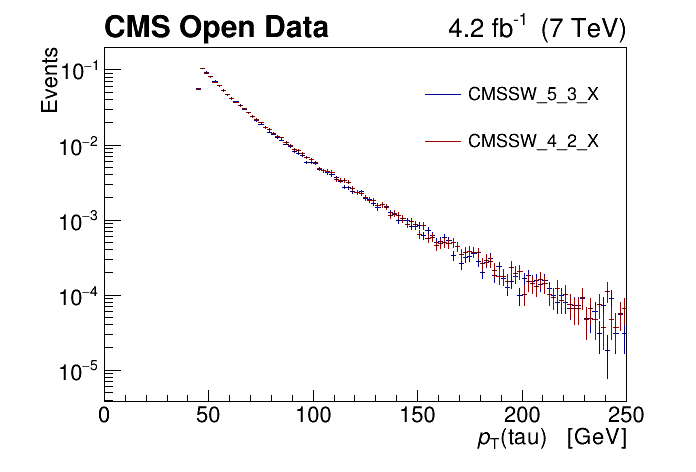

In [70]:
h = d.Get("Pt_tau_all")
h2 = f_semi.Get("SemiLeptonicTauAnaPlots/Taus/all/All/DATA/Pt")
c = ROOT.TCanvas()
h.Draw()
h.Scale(1/h.Integral())
h2.Draw("SAME")
h2.Scale(1/h2.Integral())
c.SetLogy()
h2.SetLineColor(ROOT.kRed+2)

h.SetTitle("")
h.GetXaxis().SetTitle("p_\mathrm{T}(\mathrm{tau}) \ \mathrm{[GeV]}")
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitle("Events")
h.GetYaxis().SetTitleSize(0.05)
h.GetXaxis().SetLabelSize(0.05)
h.GetYaxis().SetLabelSize(0.05)
h.GetXaxis().SetNdivisions(505)

leg = ROOT.TLegend(0.6, 0.65, .89, .85);
leg.AddEntry(h, "CMSSW_5_3_X", "l");
leg.AddEntry(h2, "CMSSW_4_2_X", "l");leg.SetBorderSize(0)
leg.Draw("SAME")
lumi_sqrtS = " 4.2 fb^{-1}  (7 TeV)"
#    print lumi_sqrtS
iPos = 0
# writing the lumi information and the CMS "logo"
# Ratio Check HERE
print(x0)
CMS_lumi.CMS_lumi(c, lumi_sqrtS, 0, 0.7, 0.6, 0.15)
c.SetBottomMargin(0.15)
c.SetLeftMargin(0.15)
c.Draw()